In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import hera_pspec as hp
from pyuvdata import UVData
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import lognorm, chi2, norm
from scipy.optimize import curve_fit
import pyuvdata.utils as uvutils

In [3]:
# Load beam model
beamfile = 'HERA_NF_dipole_power.beamfits'
cosmo = hp.conversions.Cosmo_Conversions()
uvb = hp.pspecbeam.PSpecBeamUV(beamfile, cosmo=cosmo)

In [4]:
# Load data into UVData objects
dfile = 'zen.2458101.clean-002.uvh5' #zen.2458116.34176.xx.HH.uvOCRS #zen.2458101.clean-002.uvh5 #zen.2458101.xtmdl.uvh5
uvd = UVData()
uvd.read(dfile)

mdfile = 'zen.2458101.xtmdl.uvh5' #zen.2458116.34176.xx.HH.uvOCRS #zen.2458101.clean-002.uvh5 #zen.2458101.xtmdl.uvh5
muvd = UVData()
muvd.read(mdfile)

In [5]:
bl1 = (66, 67, 'xx')
bl2 = (83, 84, 'xx')
bl3 = (37, 38, 'xx')

In [6]:
blt_inds = uvd.antpair2ind(bl1)
uvd.data_array[blt_inds, 0, :, 0] -= muvd.get_data(bl1)

blt_inds = uvd.antpair2ind(bl2)
uvd.data_array[blt_inds, 0, :, 0] -= muvd.get_data(bl2)

blt_inds = uvd.antpair2ind(bl3)
uvd.data_array[blt_inds, 0, :, 0] -= muvd.get_data(bl3)

In [9]:
# We only have 1 data file here, so slide the time axis by one integration 
# to avoid noise bias (not normally needed!)
uvd1 = uvd.select(times=np.unique(uvd.time_array)[16:44:2], inplace=False)
uvd2 = uvd.select(times=np.unique(uvd.time_array)[17:45:2], inplace=False)

In [10]:
# Create a new PSpecData object
ds = hp.PSpecData(dsets=[uvd1, uvd2], wgts=[None, None], beam=uvb)
ds.rephase_to_dset(0) # Phase to the zeroth dataset

In [11]:
# Specify which baselines to include
baselines = [(66, 67), (83, 84), (37, 38)]
# baselines = [(66, 67), (83, 84), (69, 70)]
# baselines = [(37, 38), (83, 84), (69, 70)]

# Define uvp
uvp = ds.pspec(baselines, baselines, (0, 1), [('xx', 'xx')], spw_ranges=[(300, 400), (520, 690)],  input_data_weight='identity',
               norm='I', taper='blackman-harris', verbose=True) 


Setting spectral range: (300, 400)

Using polarization pair: ('xx', 'xx')

(bl1, bl2) pair: ((66, 67), (66, 67))
pol: (-5, -5)
  Building G...
  Building q_hat...
  Normalizing power spectrum...
  Computing and multiplying scalar...

(bl1, bl2) pair: ((83, 84), (83, 84))
pol: (-5, -5)
  Building q_hat...
  Normalizing power spectrum...
  Computing and multiplying scalar...

(bl1, bl2) pair: ((37, 38), (37, 38))
pol: (-5, -5)
  Building q_hat...
  Normalizing power spectrum...
  Computing and multiplying scalar...

Setting spectral range: (520, 690)

Using polarization pair: ('xx', 'xx')

(bl1, bl2) pair: ((66, 67), (66, 67))
pol: (-5, -5)
  Building G...
  Building q_hat...
  Normalizing power spectrum...
  Computing and multiplying scalar...

(bl1, bl2) pair: ((83, 84), (83, 84))
pol: (-5, -5)
  Building q_hat...
  Normalizing power spectrum...
  Computing and multiplying scalar...

(bl1, bl2) pair: ((37, 38), (37, 38))
pol: (-5, -5)
  Building q_hat...
  Normalizing power spectrum..

Text(0.5, 1.0, 'spw : 1, blpair : ((66, 67), (66, 67)), pol : xx')

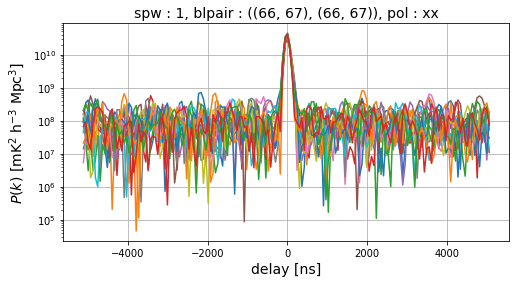

In [27]:
# with cable reflection #1
spw = 1
blp = ((66, 67), (66, 67))
# blp = ((37, 38), (37, 38))
key1 = (spw, blp, 'xx')
dlys = uvp.get_dlys(spw) * 1e9
power1 = np.real(uvp.get_data(key1))

# plot power spectrum of spectral window 1
fig, ax = plt.subplots(figsize=(8,4))
p1 = ax.plot(dlys, np.abs(power1).T)
ax.set_yscale('log')
ax.grid()
ax.set_xlabel("delay [ns]", fontsize=14)
ax.set_ylabel(r"$P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=14)
ax.set_title("spw : {}, blpair : {}, pol : {}".format(*key1), fontsize=14)

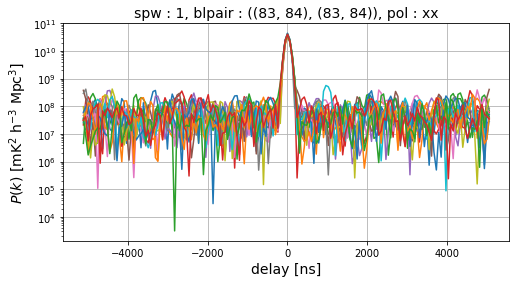

In [28]:
# no cable reflection #1
spw = 1
blp = ((83, 84), (83, 84))
# blp = ((82, 120), (82, 120))
key2 = (spw, blp, 'xx')
dlys = uvp.get_dlys(spw) * 1e9
power2 = np.real(uvp.get_data(key2))

# plot power spectrum of spectral window 1
plt.figure(figsize=(8,4))
plt.semilogy(dlys, np.abs(power2).T)
plt.grid()
plt.xlabel("delay [ns]", fontsize=14)
plt.ylabel(r"$P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=14)
plt.title("spw : {}, blpair : {}, pol : {}".format(*key2), fontsize=14)
plt.show()

Text(0.5, 1.0, 'spw : 1, blpair : ((37, 38), (37, 38)), pol : xx')

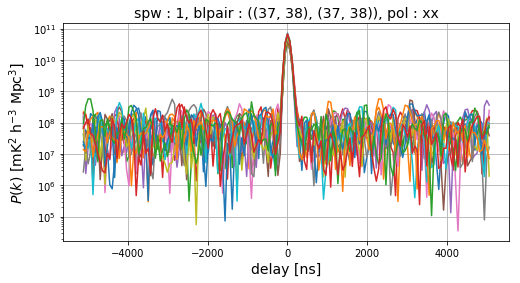

In [29]:
# no cable reflection #2
spw = 1
blp = ((37, 38), (37, 38))
# blp = ((69, 70), (69, 70))
key3 = (spw, blp, 'xx')
dlys = uvp.get_dlys(spw) * 1e9
power3 = np.real(uvp.get_data(key3))

# plot power spectrum of spectral window 1
fig, ax = plt.subplots(figsize=(8,4))
p1 = ax.plot(dlys, np.abs(power3).T)
ax.set_yscale('log')
ax.grid()
ax.set_xlabel("delay [ns]", fontsize=14)
ax.set_ylabel(r"$P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=14)
ax.set_title("spw : {}, blpair : {}, pol : {}".format(*key3), fontsize=14)

In [26]:
# Labels for future plots
def label_z_test():
    plt.hlines(total, x[0], x[-1])
    plt.text(3800, 27,'total', fontsize=12)
    plt.title('Number of groups rejecting H0', fontsize=14)
    plt.xlabel('delay [ns]', fontsize=12)
    plt.ylabel('counts', fontsize=12)
    
def label_null_test_hist():
    plt.title('Null test', fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.xlabel('difference', fontsize=12)
    
def label_null_test(x, avg):
    if avg == 'time':
        plt.hlines(0, x[0], x[-1])
        plt.xlabel('time', fontsize=12)
    plt.title('Null test', fontsize=12)
    plt.ylabel('difference', fontsize=12)
    if avg == 'delay':
        plt.xlabel('delay [ns]', fontsize=12)
    if avg == 'no':
#         plt.tick_params(
#             axis='x',          # changes apply to the x-axis
#             which='both',      # both major and minor ticks are affected
#             bottom=False,      # ticks along the bottom edge are off
#             top=False,         # ticks along the top edge are off
#             labelbottom=False)
        plt.hlines(0, x[0], x[-1])
        plt.xlabel('data samples', fontsize=12)

In [37]:
from scipy import special

def real_cnn_pdf(z, s):
    a = 1/((s**2))
    b = -np.abs(2*z)/((s**2))
    return a*np.exp(b)    

def cnn_null_pdf(x, s):
    return (1/(2*s**4))*np.exp(-2*np.abs(x)/(s**2))*(s**2+2*np.abs(x))

In [38]:
def null_test(dly1, dly2, avg):
    # null test
    dly_modes = [dly1, dly2] # ns
    dly_idx = [(np.abs(dlys - dly_modes[0])).argmin(), (np.abs(dlys - dly_modes[1])).argmin()]

    diff = {}
    for i in range(2):
        power_a = power[i] # i=0>>>power1, i=1>>>power2
        power_b = power[i+1] # i=0>>>power2, i=1>>>power3
        
        if avg == 'no':
           # get data in delay mode domain
            data_a = power_a[:][:,dly_idx[0]:dly_idx[1]] # i=0>>>data1, i=1>>>data2
            data_b = power_b[:][:,dly_idx[0]:dly_idx[1]] # i=0>>>data2, i=1>>>data3
        
            # subtraction
            if i == 0: # data2 - data1
                diff[i] = data_b.flatten() - data_a.flatten()
            if i == 1: # data2 - data3
                diff[i] = data_a.flatten() - data_b.flatten()
            
        if avg == 'delay':        
            # get data in delay mode domain
            data_a = np.mean(power_a[:][:,dly_idx[0]:dly_idx[1]], axis=0) # i=0>>>data1, i=1>>>data2
            data_b = np.mean(power_b[:][:,dly_idx[0]:dly_idx[1]], axis=0) # i=0>>>data2, i=1>>>data3
            # subtraction
            if i == 0:
                diff[i] = data_b-data_a
            if i == 1:
                diff[i] = data_a-data_b
                
        if avg == 'time':      
            # get data in delay mode domain
            data_a = np.mean(power_a[:][:,dly_idx[0]:dly_idx[1]], axis=1) # i=0>>>data1, i=1>>>data2
            data_b = np.mean(power_b[:][:,dly_idx[0]:dly_idx[1]], axis=1) # i=0>>>data2, i=1>>>data3
            # subtraction
            if i == 0:
                diff[i] = data_b-data_a
            if i == 1:
                diff[i] = data_a-data_b
        
        # create x-axis when avg='delay'
        inc = (dly2-dly1)/len(diff[0])
        ddly = []
        for i in range(len(diff[0])):
            ddly.append(dly1+inc*(i+1)-(inc/2))             
            
    # Fit the null-test results (differences) with complex double gaussian difference distribution
    s = []
    for i in range(len(diff)):
        z = diff[i]
        y, x = np.histogram(z, bins='auto', density=True)
        x = (x + np.roll(x, -1))[:-1] / 2.0
        popt, pcov = curve_fit(cnn_null_pdf, x, y, p0=[np.std(z)])
        s.append(popt[0])        

    # Perform AD-test to see if the null test results are randomly distributed
    # get cdf of each dataset
    cdf = []
    for i in range(len(diff)):
        cdf.append(np.array(range(len(diff[i])))/float(len(diff[i])))

    # get cdf of each fit
    fit_cdf = []
    for i in range(len(diff)):
        m_x = np.linspace(min(diff[i]), max(diff[i]), len(diff[i]))
        m_y = cnn_null_pdf(m_x, s[i])
        fit_cdf.append(np.cumsum(m_y))

    a = []
    for i in range(len(diff)):
        a.append(stats.anderson_ksamp([cdf[i], fit_cdf[i]])[0])
    cv = stats.anderson_ksamp([cdf[i], fit_cdf[i]])[1]

    # Plot null-test results
    fit_x = [np.linspace(min(diff[0]), max(diff[0]), 1000), np.linspace(min(diff[1]), max(diff[1]), 1000)]
    x = np.linspace(0, len(diff[0])-1, len(diff[0]))
    plt.subplots(4, 2, sharex=True, figsize=(12, 10))
    plt.subplots_adjust(hspace=.6, wspace=.3)
    for i in range(8):
        pos = 421+i
        plt.subplot(pos)
        if i == 0:
            idx = 1
            plt.semilogy(dlys, power[1].T)
        elif i == 2:
            idx = 0
            plt.semilogy(dlys, power[0].T)
        elif i == 1:
            idx = 1
            plt.semilogy(dlys, power[1].T)
        elif i == 3:
            idx = 3
            plt.semilogy(dlys, power[2].T)
        elif i == 4:
            label_null_test(x, avg)
            if avg == 'no' or avg == 'time':
                plt.plot(x, diff[0], '.')
            if avg == 'delay':
                plt.plot(ddly, diff[0], '.')
                plt.hlines(0, ddly[0], ddly[-1])
            continue
        elif i == 5:
            label_null_test(x, avg)
            if avg == 'no' or avg == 'time':
                plt.plot(x, diff[1], '.')
            if avg == 'delay':
                plt.plot(ddly, diff[1], '.')
                plt.hlines(0, ddly[0], ddly[-1])
            continue
        elif i == 6:
            plt.hist(diff[0], bins='auto', density=True, histtype='bar', rwidth=0.8)
            plt.plot(fit_x[0], cnn_null_pdf(fit_x[0], s[0]), '--')
#             label_null_test_hist()
            continue
        else:
            plt.hist(diff[1], bins='auto', density=True, histtype='bar', rwidth=0.8)
            plt.plot(fit_x[1], cnn_null_pdf(fit_x[1], s[1]), '--')
#             label_null_test_hist()
            continue
        # Box regions that went through the tests
        plt.vlines(dly_modes[0], 1e4, 1e10)   # 1e4
        plt.vlines(dly_modes[1], 1e4, 1e10)
        plt.hlines(1e4, dly_modes[0], dly_modes[1])
        plt.hlines(1e10, dly_modes[0], dly_modes[1])
        plt.xlabel("delay [ns]", fontsize=12)
        plt.ylabel(r"$P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=12)
        plt.title("spw : {}, blpair : {}, pol : {}".format(*key[idx]), fontsize=12)
    plt.show()

    plt.figure(figsize=(6, 3))
    plt.plot(2, a[0], 'k*', label='systematics')
    plt.plot(2, a[1], 'k^', label='control')
    plt.plot(11, 3, alpha=0)
    plt.hlines(cv[2], 0, 4, 'r', label='critical value for the 5% level')
    plt.hlines(cv[3], 0, 4, 'b', label='critical value for the 2.5% level')
    plt.hlines(cv[4], 0, 4, 'k', label='critical value for the 1% level')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    plt.legend(loc='center right')
    plt.ylabel('test value')

    plt.title('AD-test')

p-value floored: true value smaller than 0.001
p-value floored: true value smaller than 0.001
p-value floored: true value smaller than 0.001


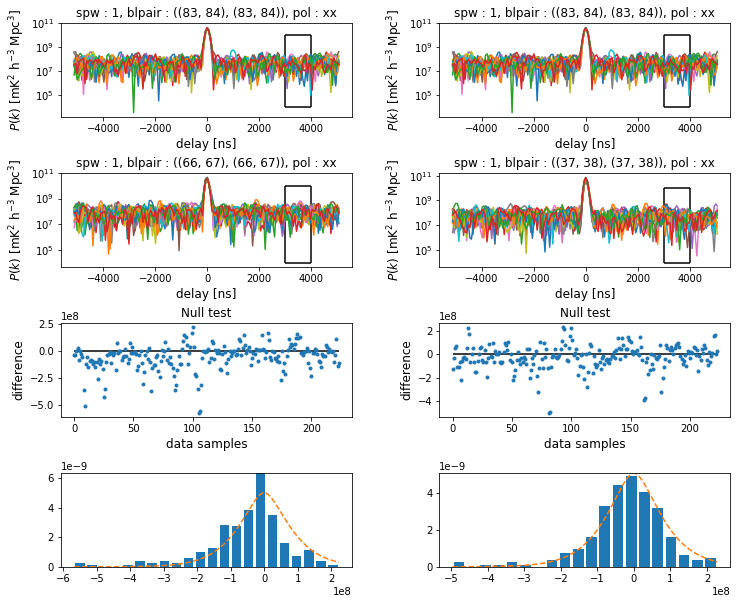

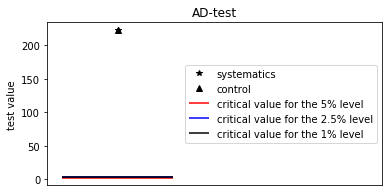

In [39]:
null_test(3000, 4000,'no')